## Kaggle Advance House Price Prediction Using Pytorch- Tabular Dataset

https://www.fast.ai/2018/04/29/categorical-embeddings/     https://yashuseth.blog/2018/07/22/pytorch-neural-network-for-tabular-data-with-categorical-embeddings/

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [3]:
df.shape

(1201, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [5]:
df.describe()

,MSSubClass,LotFrontage,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,57.198168,70.049958,9951.698585,1970.580350,1158.437968,346.073272,180770.480433
std,43.106427,24.284752,7924.353975,31.750335,386.257235,435.143451,83389.519866
min,20.000000,21.000000,1300.000000,1872.000000,334.000000,0.000000,34900.000000
25%,20.000000,59.000000,7420.000000,1950.000000,876.000000,0.000000,127500.000000
50%,50.000000,69.000000,9262.000000,1972.000000,1082.000000,0.000000,159500.000000
75%,70.000000,80.000000,11249.000000,2003.000000,1383.000000,728.000000,213500.000000
max,190.000000,313.000000,215245.000000,2010.000000,4692.000000,2065.000000,755000.000000


In [6]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [7]:
for i in df.columns:
    print(" column name{} and unique values are --- {}". format(i, len(df[i].unique())))

 column nameMSSubClass and unique values are --- 15
 column nameMSZoning and unique values are --- 5
 column nameLotFrontage and unique values are --- 110
 column nameLotArea and unique values are --- 869
 column nameStreet and unique values are --- 2
 column nameLotShape and unique values are --- 4
 column nameYearBuilt and unique values are --- 112
 column name1stFlrSF and unique values are --- 678
 column name2ndFlrSF and unique values are --- 368
 column nameSalePrice and unique values are --- 597


In [8]:
#Handling yearbuilt column

import datetime
datetime.datetime.now().year

2020

In [9]:
df['total years']=datetime.datetime.now().year - df['YearBuilt']
df.drop(['YearBuilt'], axis=1, inplace=True)

In [10]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,total years
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,17
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,44
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,19
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,105
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,20


In [11]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'total years'],
      dtype='object')

In [12]:
#creating categorical features
cat_features=["MSSubClass", "MSZoning", "Street", "LotShape"]
out_feature="SalePrice"

In [13]:
df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85], dtype=int64)

In [14]:
#Label encoding to encode MSsubclass into categorical
from sklearn.preprocessing import LabelEncoder
label_encoder= {}
label_encoder["MSSubClass"]= LabelEncoder()
label_encoder["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder= {}
for feature in cat_features:
    label_encoder[feature]=LabelEncoder()
    df[feature]=label_encoder[feature].fit_transform(df[feature])

In [16]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,total years
0,5,3,65.0,8450,1,3,856,854,208500,17
1,0,3,80.0,9600,1,3,1262,0,181500,44
2,5,3,68.0,11250,1,0,920,866,223500,19
3,6,3,60.0,9550,1,0,961,756,140000,105
4,5,3,84.0,14260,1,0,1145,1053,250000,20


In [17]:
import numpy as np
cat_features=np.stack([df["MSSubClass"],df["MSZoning"],df["Street"],df['LotShape']], 1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [18]:
#converting numpy to tensors
import torch
cat_features= torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [19]:
#considering all continuous values
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [20]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'total years']

In [21]:
#stacking and converting into tensors
cont_values=np.stack([df[i].values for i in cont_features], axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    17.],
        [   80.,  9600.,  1262.,     0.,    44.],
        [   68., 11250.,   920.,   866.,    19.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    79.],
        [   68.,  9717.,  1078.,     0.,    70.],
        [   75.,  9937.,  1256.,     0.,    55.]])

In [22]:
cont_values.dtype

torch.float32

In [23]:
y=torch.tensor(df["SalePrice"].values, dtype=torch.float).reshape(-1,1)  #Y should be 2d so reshaping 
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int32  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int32  
 5   LotShape     1201 non-null   int32  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   total years  1201 non-null   int64  
dtypes: float64(1), int32(3), int64(6)
memory usage: 89.1 KB


In [25]:
df.shape

(1201, 10)

In [26]:

cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

## Embedding size for categoricals


In [27]:
cal_dims=[len(df[col].unique()) for col in ["MSSubClass","MSZoning", "Street","LotShape"]]

In [28]:
#input dim
cal_dims

[15, 5, 2, 4]

In [29]:
##output dim should be set based on input dim(min(50, feature_dim/2))

import numpy
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cal_dims]

In [30]:
#shows input and out dim
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [31]:
#importing torch and functional modules
#ModuleList is used bec more than 1 embedding layer is going to generate
import torch
import torch.nn as nn
import torch.nn.functional as f
embded_representaion=nn.ModuleList([nn.Embedding(inp, out) for inp,out in embedding_dim ])
embded_representaion

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [32]:
#these cat_features are encoded one
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [33]:
#to convert cat_features into vectors considering only few columns
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [34]:
#converting cat_features into vectors and appending to embedding_val with i as index where is e is vector represenation of cat_features
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embded_representaion):
    embedding_val.append(e(cat_features[:,i]))

In [35]:
embedding_val

[tensor([[ 0.5586,  0.7955,  0.9381,  ..., -0.0167, -0.6015, -2.1066],
         [ 0.0317,  0.3852, -0.4949,  ..., -0.6540,  2.2033, -1.4805],
         [ 0.5586,  0.7955,  0.9381,  ..., -0.0167, -0.6015, -2.1066],
         ...,
         [-2.1068,  2.0721, -2.2932,  ..., -0.4560,  0.5922, -1.0102],
         [ 0.0317,  0.3852, -0.4949,  ..., -0.6540,  2.2033, -1.4805],
         [ 0.0317,  0.3852, -0.4949,  ..., -0.6540,  2.2033, -1.4805]],
        grad_fn=<EmbeddingBackward>),
 tensor([[ 0.1584, -0.2756, -0.0725],
         [ 0.1584, -0.2756, -0.0725],
         [ 0.1584, -0.2756, -0.0725],
         ...,
         [ 0.1584, -0.2756, -0.0725],
         [ 0.1584, -0.2756, -0.0725],
         [ 0.1584, -0.2756, -0.0725]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.1177],
         [-0.1177],
         [-0.1177],
         ...,
         [-0.1177],
         [-0.1177],
         [-0.1177]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.7594, -1.2808],
         [-0.7594, -1.2808],
         [-0.1452,  0.285

[ 0.0739,  1.1856, -0.7125,  ..., -0.9354, -0.1080, -1.7212], is vector represebtaion of 5
 0.3350, -0.2715,  3.1398,  ...,  0.6049, -0.0288,  0.9025], is vector represebtaion of  
  0.0739,  1.1856, -0.7125,  ..., -0.9354, -0.1080, -1.7212], is vector represebtaion of 5
  
  ([[ 0.9267,  0.7152, -0.0077], is vector represebtaion of 3 column1

## Satcking these values in columnwise concatenetiing as
        [[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])
    
    [ 0.0739,  1.1856, -0.7125,  ..., -0.9354, -0.1080, -1.7212],[ 0.9267,  0.7152, -0.0077],([[0.1902],[-1.9328,  0.7367],

In [36]:
#columnwise stacking
z = torch.cat(embedding_val, 1)
z

tensor([[ 0.5586,  0.7955,  0.9381,  ..., -0.1177, -0.7594, -1.2808],
        [ 0.0317,  0.3852, -0.4949,  ..., -0.1177, -0.7594, -1.2808],
        [ 0.5586,  0.7955,  0.9381,  ..., -0.1177, -0.1452,  0.2852],
        ...,
        [-2.1068,  2.0721, -2.2932,  ..., -0.1177, -0.7594, -1.2808],
        [ 0.0317,  0.3852, -0.4949,  ..., -0.1177, -0.7594, -1.2808],
        [ 0.0317,  0.3852, -0.4949,  ..., -0.1177, -0.7594, -1.2808]],
       grad_fn=<CatBackward>)

In [37]:
z.shape

torch.Size([1201, 14])

In [38]:
#40% dropout ratio used to prevent overfitting
dropout_layer= nn.Dropout(0.4)

In [39]:
final_embedded= dropout_layer(z)
final_embedded.shape

torch.Size([1201, 14])

## Creating forwardfeed neural network

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):
    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x



In [41]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [42]:
model.parameters

<bound method Module.parameters of FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)>

In [43]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [44]:
df.shape

(1201, 10)

In [45]:
1200-240

960

In [46]:
batch_size=1200
test_size=int(batch_size*0.20)  #taking 20% of batch size for testing  #1200*0.20 = 240
train_categorical=cat_features[:batch_size-test_size] #train_cat ==960
test_categorical=cat_features[batch_size-test_size:batch_size]  
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [47]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)


(960, 240, 960, 240, 960, 240)

In [61]:
epochs=3000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%100==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()   #resetting optimiser
    loss.backward()   #backpropogation
    optimizer.step()

Epoch number: 1 and the loss : 94840.265625
Epoch number: 101 and the loss : 89054.265625
Epoch number: 201 and the loss : 85869.3515625
Epoch number: 301 and the loss : 80518.421875
Epoch number: 401 and the loss : 75946.671875
Epoch number: 501 and the loss : 68857.703125
Epoch number: 601 and the loss : 64743.375
Epoch number: 701 and the loss : 58908.34375
Epoch number: 801 and the loss : 54509.36328125
Epoch number: 901 and the loss : 51219.12109375
Epoch number: 1001 and the loss : 48437.3515625
Epoch number: 1101 and the loss : 45120.28125
Epoch number: 1201 and the loss : 43354.765625
Epoch number: 1301 and the loss : 40521.02734375
Epoch number: 1401 and the loss : 39221.1875
Epoch number: 1501 and the loss : 36693.86328125
Epoch number: 1601 and the loss : 36035.671875
Epoch number: 1701 and the loss : 36046.37890625
Epoch number: 1801 and the loss : 35068.73046875
Epoch number: 1901 and the loss : 35824.3671875
Epoch number: 2001 and the loss : 35786.578125
Epoch number: 210

Text(0.5, 1.0, 'RMSE VS EPOCHS')

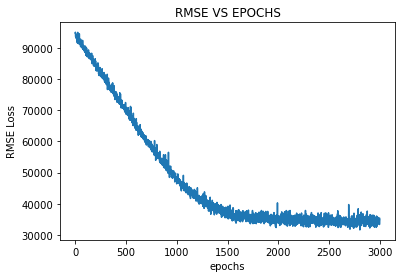

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel("RMSE Loss")
plt.xlabel("epochs")
plt.title("RMSE VS EPOCHS")

In [63]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 43269.078125


In [64]:
#### Validate the Test Data
y_pred_train=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 45482.53515625


In [65]:
data_actual=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [66]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [67]:
output=pd.concat([data_actual,data_predicted],axis=1)
output['Difference']=output['Test']-output['Prediction']
output.head()

,Test,Prediction,Difference
0,245350.0,250471.953125,-5121.953125
1,173000.0,218400.046875,-45400.046875
2,235000.0,241198.109375,-6198.109375
3,625000.0,447652.968750,177347.031250
4,171000.0,148545.000000,22455.000000


In [68]:

#### Saving The Model
#### Save the model
torch.save(model,'HousePrice.pt')

In [69]:
torch.save(model.state_dict(),'HouseWeights.pt')  #save model with weights

In [70]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [71]:

model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [72]:

model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)